# Case study on Image classification:

# Context:
- We are given a **dataset** which contains image data. 
- The data contains **pixel values** of the images in csv format. 
- Each image represents one of the number from 0, 1, 2, ..., 8, 9. So there are 10 possible outcomes for each row of data. As the data contains the pixel values of the image in each row. 
- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. 
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter shade. 
- This pixel-value is an integer between 0 and 255, inclusive.
- The data set has 785 columns. 
- The first column, called "label", is the digit which is in the image. 
- *The* rest of the columns contain the pixel-values of the associated image.

# Problem:
- Classify the image based on the pixel value.
- The result of the model should be the number which is represented by the pixel values.
- Use Supervised Learning method for it.

# Data:
- **label:** A value between 0 and 9. Both inclusive. Total 10 unique values.
- **pixel0, pixel1, pixel2, ..., pixel782, pixel783:** Each value in these columns is between 0 and 255. Which represents the pixel intensity. 

In [159]:
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [160]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [161]:
lenna_image =  cv2.imread('/content/drive/MyDrive/GL_Mentor/Data/test_image.png')

In [162]:
print('Image Dimensions',lenna_image.shape)

Image Dimensions (220, 220, 3)


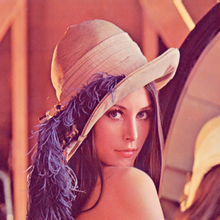

In [163]:
#Show image
cv2_imshow(lenna_image)

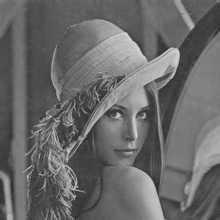

In [164]:
#Break down across each channel
lenna_red_channel = lenna_image[:,:,0]
cv2_imshow(lenna_red_channel)

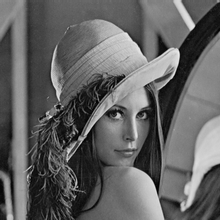

In [165]:
lenna_green_channel = lenna_image[:,:,1]
cv2_imshow(lenna_green_channel)

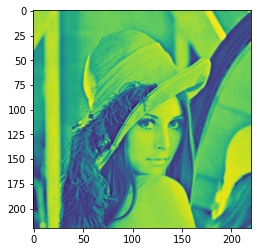

In [8]:
lenna_blue_channel = lenna_image[:,:,2]
plt.imshow(lenna_blue_channel)

Grey Scale Dimensions: (220, 220)


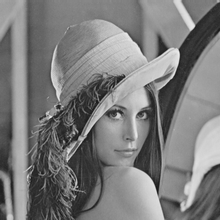

In [9]:
# Change color to Gray Scale
grey_image = cv2.cvtColor(lenna_image,cv2.COLOR_BGR2GRAY)
print('Grey Scale Dimensions:',grey_image.shape)
cv2_imshow(grey_image)


In [23]:
# Add Brightness & Contrast
#new_image(i,j) = alpha*image(i,j) + beta
new_image = np.zeros(lenna_image.shape, lenna_image.dtype)
alpha = 2.0 # Simple contrast control
beta = 10    # Simple brightness control
for y in range(lenna_image.shape[0]):
    for x in range(lenna_image.shape[1]):
        for c in range(lenna_image.shape[2]):
            new_image[y,x,c] = np.clip(alpha*lenna_image[y,x,c] + beta, 0, 255)

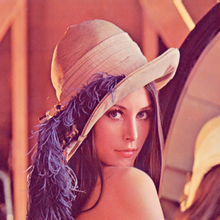

In [24]:
cv2_imshow(lenna_image)

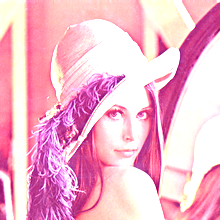

In [25]:
cv2_imshow(new_image)

In [26]:
# Mamography Images for feature creation
dense = mpimg.imread('/content/drive/MyDrive/GL_Mentor/Data/all-mias/mdb003.pgm')
fatty = mpimg.imread('/content/drive/MyDrive/GL_Mentor/Data/all-mias/mdb005.pgm')

In [166]:
dense.shape

(1024, 1024)

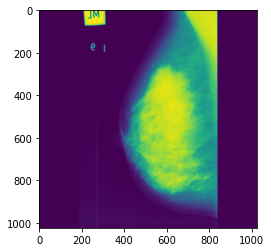

In [27]:
plt.imshow(dense)

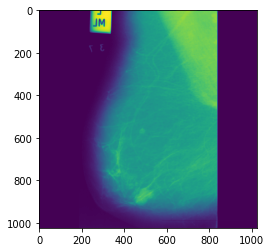

In [28]:
plt.imshow(fatty)

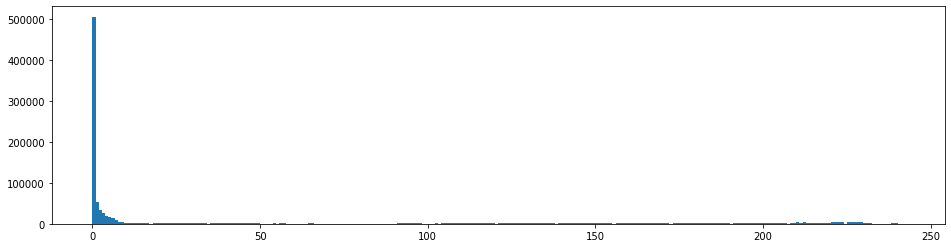

In [29]:
fig = plt.figure(figsize=(16,4))
plt.hist(dense.ravel(),bins=256)
plt.show()

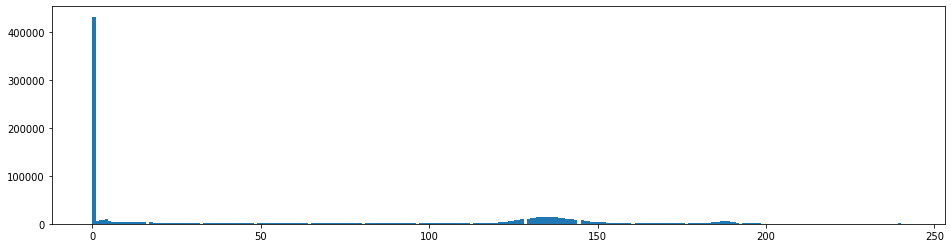

In [30]:
fig = plt.figure(figsize=(16,4))
plt.hist(fatty.ravel(),bins=256)
plt.show()

In [31]:
threshold = 50
dense_bin = (dense > threshold)
fatty_bin = (fatty > threshold)

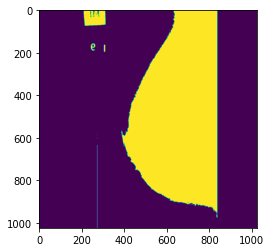

In [32]:
plt.imshow(dense_bin)

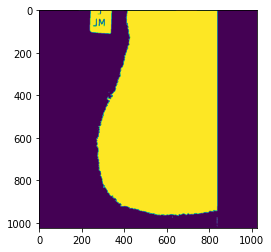

In [37]:
plt.imshow(fatty_bin)

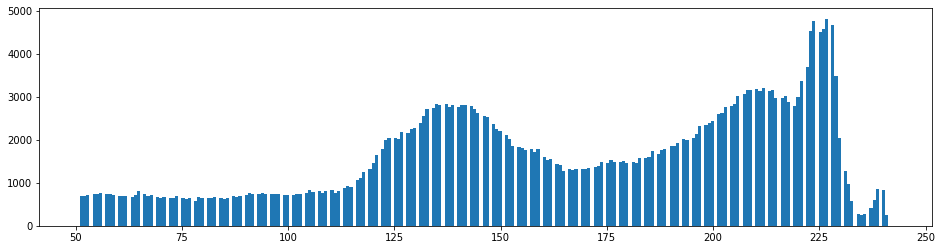

In [38]:
fig = plt.figure(figsize=(16,4))
plt.hist(dense[dense_bin],bins=256)
plt.show()

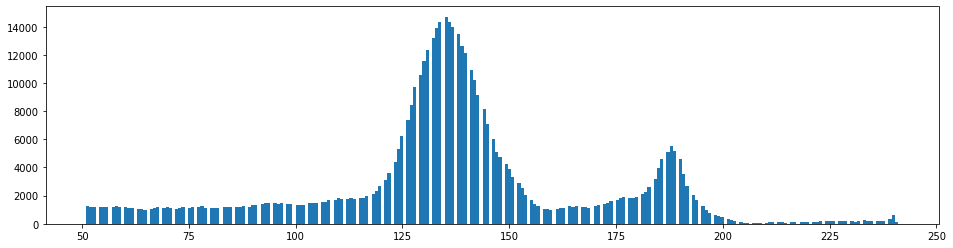

In [39]:
fig = plt.figure(figsize=(16,4))
plt.hist(fatty[fatty_bin],bins=256)
plt.show()

In [24]:
# Qn - Use a central measure such as mean, median or mode to classify images in this case.

## Loading the data
- We use panda's read_csv to read train.csv into a dataframe.
- Then we separate our images and labels for supervised learning.
- We also do a train_test_split to break our data into two sets, one for training and one for testing. This let's us measure how well our model was trained by later inputting some known test data.

In [167]:
data = pd.read_csv('/content/drive/MyDrive/GL_Mentor/Data/dataset_week_1.csv')    # Load the dataset by providing the path to the file.

In [168]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
data.shape

(10008, 785)

### Add on:

Why does it have 785 columns?

In [170]:
# The labels for images.
y = data["label"]

Let's see some of the labels.

In [171]:
print(y[0])               # Label for 1st image.
print(y[2000])            # Label for 2001st image.

1
3


### Now let's prepare the data according to the model input.

##Add on:

What should we do to prepare the data according to the model input?

Let's see in the next steps.

In [172]:
# Drop 'label' column.
X = data.drop(labels = ["label"], axis = 1)

## Think about it:

Why did we drop the labels from the data and saved it into new variable "X"?

## Think about it:

Do we know, how the data distribution looks like across all the numbers?

i.e. We need to know the images corresponding to each number.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


5    1002
7    1001
6    1001
3    1001
9    1001
1    1001
8    1001
4    1000
2    1000
0    1000
Name: label, dtype: int64

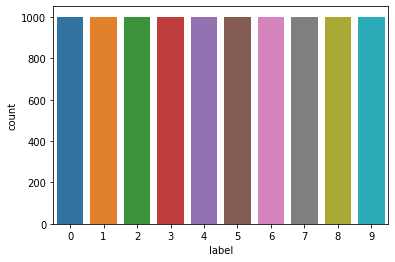

In [173]:
g = sns.countplot(y)
y.value_counts()
#Distribution of y ?

### We can see from the above plot that the data is evenly distributed among all the classes (from 0, 1, 2, ..., 8, 9). So, the dataset is perfectly balanced.

## Add-on:
- What type of classification is this?
- If we are to use neural networks, what activation functions do we need in the output layer?

## Think about it:

Have we checked if our data has any missing values?

# Check for null and missing values

In [177]:
# Check the data
X.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

#### I checked for corrupted images (missing values inside).


#### There is no missing values in the dataset. So we can safely go ahead.

## Think about it:

- Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.
- As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

# Normalization
- We perform a grayscale normalization to reduce the effect of illumination's differences.

In [178]:
# Normalize the data
X = X.astype('float32') / 255.0


## Add-on:
Overfitting? Why or why not?

## Add on:

- When using Neural Networks, Normalization helps. (Neural networks process inputs using small weight values, and inputs with large integer values can disrupt or slow down the learning process.)
- As such it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1.

https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/


In [179]:
X = X.values # Convert the features (pixel values) to numpy array to feed into the supervised learning model.
y = y.values # Convert the labels to numpy array to feed into the supervised learning model.

In [180]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

In [181]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.

numpy.ndarray

#### We can get a better sense for one of these examples by visualising the image and looking at the label.

# Viewing an Image
- Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels)
- Then, we plot the image and label with matplotlib

##### You can change the value of variable i to check out other images and labels.¶

In [182]:
X[0].shape

(784,)

In [184]:
X[0].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Text(0.5, 1.0, '0')

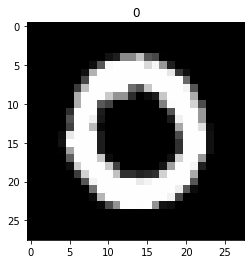

In [79]:
i=1
img = X[i]  # 1 D array
img = img.reshape((28,28))   # reshape because images are 2 D
plt.imshow(img, cmap='gray')  # show 2D image
plt.title(y[i])
# Dominating pixel values - background dark, white - value 255, and then border ones gray - in between 0 - 255
# Histogram of pixels, mode will be at 0 - true for diff digits - in this example - Histogram wont work as get similar kind of distibutions - not applicable here - Use Gaussian Blur here 

Text(0.5, 1.0, '8')

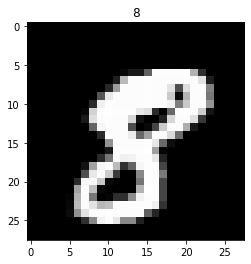

In [80]:
i=10
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

Text(0.5, 1.0, '3')

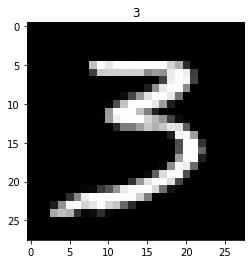

In [81]:
i=25
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

In [82]:
X.shape

(10008, 784)

In [83]:
X.reshape((10008, 28, 28))

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Add-on:
- What is `X[i]`'s shape?
- How to reshape the whole array instead of just one row?
- What's the shape of the reshaped array?

### In the original data, the pixel values were in a 1-Dimensional array.
### We converted that 1-D array of 784 pixel values into an 2-D array of shape (28 X 28).
### Note that 28 multiplied by 28 is equal to 784.
### As each pixel value represents dark or white spot, when we plot the 28x28 pixel's array, we get the above image.
### So, it validates the fact that image can be represented by an numpy array.
### Each value of the above numpy array represents a pixel, which has value between 0 and 255.

# Examining the Pixel Values:
- Note that these images aren't actually black and white (0,1). They are gray-scale (0-255).
- A histogram of this image's pixel values shows the range.

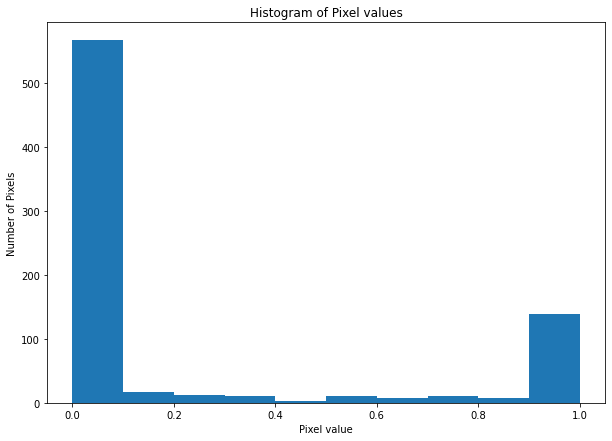

In [84]:
plt.figure(figsize=(10,7), edgecolor='blue')

n, bins, patches = plt.hist(X[1], bins=10, range=(0.0, 1.0))
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()
#Main mode at 0 and other 255- denote number

## Think about it:

What is the interpretation of the above plot regarding:
- The pixel values: on x-axis.
- Number of such pixels: on y-axis.

## Think about it:

- Have we visualized the image yet? How do they look?

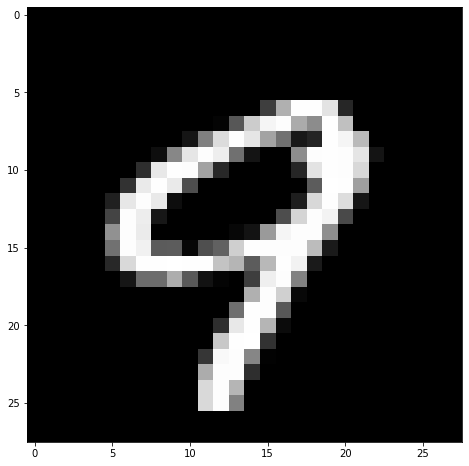

In [85]:
i=100                             # We have choosed an image from the dataset with i=100, i.e. 101th image.
img = X[i]                        
img = img.reshape((28,28))

plt.figure(figsize = (8,8))        
plt.imshow(img, cmap='gray');

## Think about it:

- Why did we used the .reshape() function, and what is significance of (28,28)?

In [86]:
X[i].shape

(784,)

In [185]:
y[1]

0

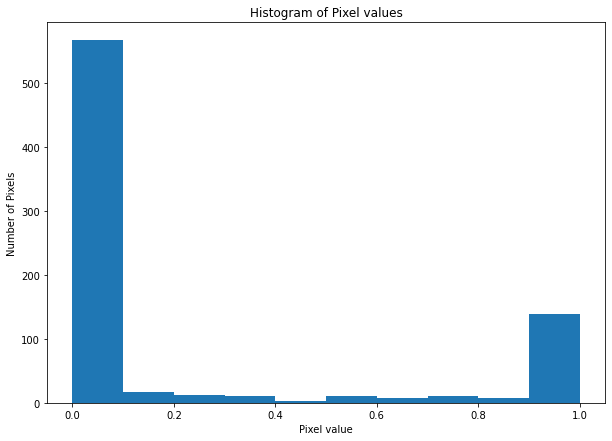

In [87]:
plt.figure(figsize=(10,7), edgecolor='blue')

n, bins, patches = plt.hist(X[1], bins=10, range=(0.0, 1.0))
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

In [ ]:
y[]

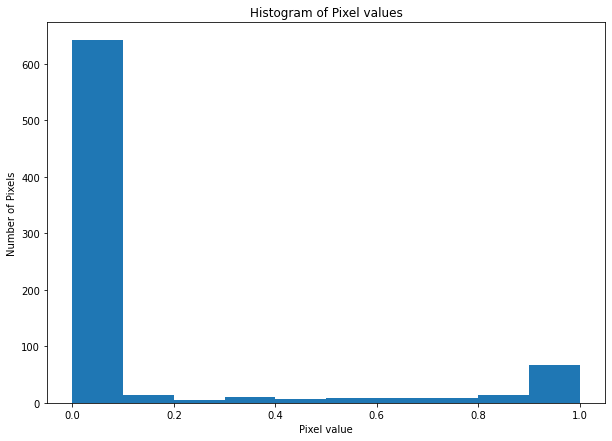

In [88]:
plt.figure(figsize=(10,7), edgecolor='blue')

counts, bins, bars = plt.hist(X[i])
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

In [ ]:
# Measures for central tendency wont work in this case as distribution for pixels are similar across different numbers

### Let's visualze some other image:

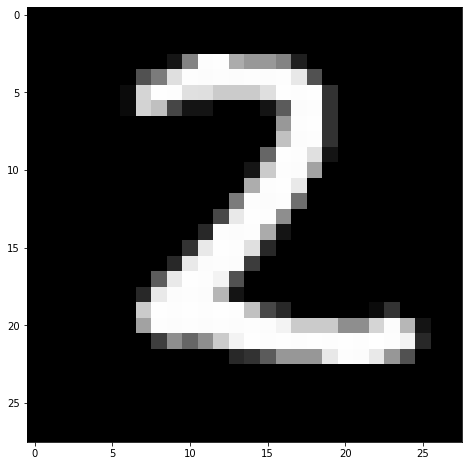

In [89]:
i=101
img = X[i]                        
img = img.reshape((28,28))

plt.figure(figsize = (8,8))        
plt.imshow(img, cmap='gray');

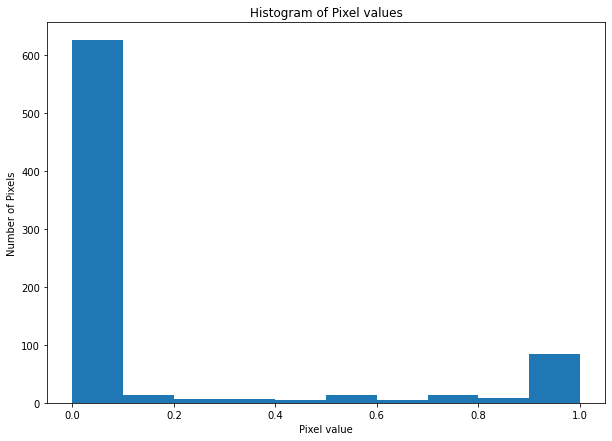

In [90]:
plt.figure(figsize=(10,7), edgecolor='blue')

counts, bins, bars = plt.hist(X[i])
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

In [91]:
for bar in bars:          # Print the bars (which the hist() function returned)
  print(bar)

Rectangle(xy=(-6.93889e-18, 0), width=0.1, height=626, angle=0)
Rectangle(xy=(0.1, 0), width=0.1, height=13, angle=0)
Rectangle(xy=(0.2, 0), width=0.1, height=7, angle=0)
Rectangle(xy=(0.3, 0), width=0.1, height=7, angle=0)
Rectangle(xy=(0.4, 0), width=0.1, height=5, angle=0)
Rectangle(xy=(0.5, 0), width=0.1, height=14, angle=0)
Rectangle(xy=(0.6, 0), width=0.1, height=5, angle=0)
Rectangle(xy=(0.7, 0), width=0.1, height=14, angle=0)
Rectangle(xy=(0.8, 0), width=0.1, height=9, angle=0)
Rectangle(xy=(0.9, 0), width=0.1, height=84, angle=0)


### From above histogram, we can see that the there are more number of pixels which have value equal to zero. 
### Zero value represents black pixel.
### From the image we saw before, we observed that the black portion of image was more than the white portion.
### It confirms that white pixel is represented by value equal to 1.

----------------------------------------------------

## Think about it:

- What should be our next step while understanding about the images?

# Training our model
- First, we use the sklearn.ensemble module to create a **random forest classifier**.
- Next, we pass our training images and labels to the classifier's fit method, which trains our model.
- Finally, the test images and labels are passed to the score method to see how well we trained our model. Score will return a float between 0-1 indicating our accuracy on the test data set

##### Try playing with the parameters of RandomForestClassifier() to see how the results change.¶

In [186]:
#First Model with pixels as features
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
# Using dataset as is 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [187]:
clf.score(X_test, y_test)

0.9376498800959233

In [188]:
y_pred = clf.predict(X_test)

 How did our model do?
- You should have gotten around 0.9376, or **93.76% accuracy**. This is good.

Text(0.5, 1.0, '8')

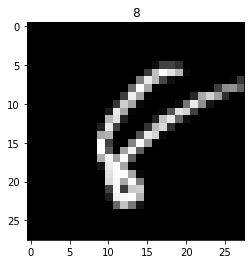

In [189]:
img = X_test[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_pred[i])

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [190]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Confusion Matrix ===
[[233   0   2   0   0   0   4   0   2   0]
 [  0 253   4   0   0   0   2   0   0   0]
 [  1   4 203   1   1   0   0   6   3   2]
 [  2   1   6 245   0   7   3   0   5   3]
 [  1   0   1   0 224   0   1   0   3  11]
 [  0   0   1   5   1 253   3   0   3   3]
 [  1   0   1   0   0   2 247   0   1   0]
 [  2   0   5   1   2   0   0 241   0   7]
 [  0   2   3   8   0   1   4   0 229   2]
 [  2   0   0   3   9   2   1   1   4 218]]


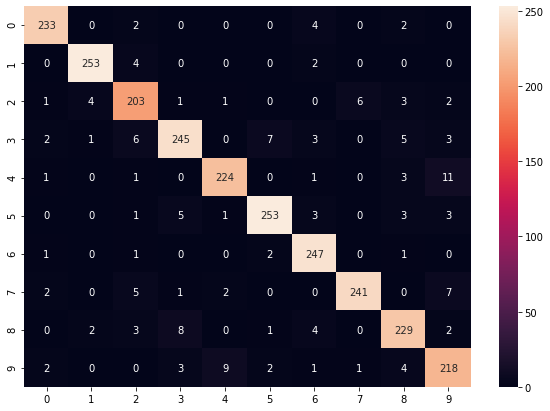

In [191]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')
#EDA for 4 and 7 as 9, misclassifying as similar - Baseline model 

In [69]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       241
           1       0.97      0.98      0.97       259
           2       0.90      0.92      0.91       221
           3       0.93      0.90      0.92       272
           4       0.95      0.93      0.94       241
           5       0.95      0.94      0.95       269
           6       0.93      0.98      0.96       252
           7       0.97      0.93      0.95       258
           8       0.92      0.92      0.92       249
           9       0.89      0.91      0.90       240

    accuracy                           0.94      2502
   macro avg       0.94      0.94      0.94      2502
weighted avg       0.94      0.94      0.94      2502



### So, we got a pretty good accuracy on classification of the images of digits, as the classification report shows.

# Using Gaussian Blurring in Pre-Processing:
- Now we'll use **gaussian blurring** in the **pre-processing**.
- And see how it affects the **model accuracy**.

### To apply gaussian blurring:
- We have to convert the flattened 1-D array to 2-D array.
- The shape of 2-D array is 28x28 pixels.
- Then we apply gaussian blurring filter to each of the image.
- After applying filter, we have to convert the 2-D array to 1-D array with shape 784 pixels. So that we can feed that into the traditional supervised learning algorithm as we did in the case above.

In [93]:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) # The shape of dataset tells us that there are 10008 numbers, each of which has 784 pixels. (It's the shape of the numpy array)

10008
(10008, 784)


In [192]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((10008, 28, 28)) 
#empty array

In [193]:
new_x.shape

(10008, 28, 28)

In [194]:
# We can see that each digit is made of 784 pixels.
X[0].shape 

(784,)

In [195]:
# In the following step, we iterate through each row, and convert the 1-D array of 784 pixels to an array of 28x28 pixels 2-D array. 
for idx, line in enumerate(X):
  new_x[idx] = line.reshape((28, 28))

 # loop through all images and reshape 28 by 28 

In [98]:
lst = ['a', 'b', 'c']
for idx, item in enumerate(lst):
  print(idx, item)

0 a
1 b
2 c


In [99]:
new_x.shape

(10008, 28, 28)

## Add-on:

walk-through the code :)

In [100]:
# Here we see that the length of new dataset after application of Gaussian Blurring filter is same as previous one.
# i.e. Total number of images is same.
len(new_x)

10008

In [101]:
# Now we apply the gaussian blur to each 28x28 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

# Gaussian Blur available in opencv - iterate through each image, use gaussian filter of 5 by 5, Std Dev of 0 -> Take std dev same as filter size
# 28 by 28 image convolved by 5 by 5 gaussian dist of std dev of 5 

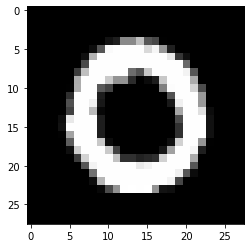

In [104]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(X[1].reshape((28, 28)), cmap='gray')

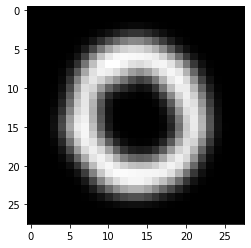

In [102]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[1], cmap='gray')
#plt.title(y[i])
# Blurry image and find overall structure of 0 

## Please Note:
NEVER loop through a numpy array or pandas df! Use vectorized operations instead!
https://www.pythonlikeyoumeanit.com/Module3_IntroducingNumpy/VectorizedOperations.html

## Add-on:
- How to do this with vectorized operations?


In [68]:
X.shape

(10008, 784)

In [107]:
X.reshape((-1, 28, 28)).shape

(10008, 28, 28)

In [110]:
X.reshape((10008, 28, 28)).shape

(10008, 28, 28)

In [117]:
X_new = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5, 5), 0), 
    1, 
    X.reshape((-1, 28, 28))
)
# -1 infer as number of elements


In [118]:
X_new = X_new.reshape((-1, 28, 28))

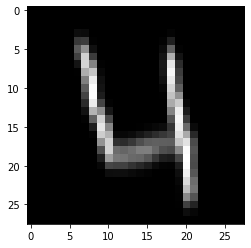

In [119]:
plt.imshow(X_new[3], cmap='gray')

### By looking at the above image, we can clearly see the difference after the application of the Gaussian Blurring filter, the image noise is reduced, the image is more smooth now.

## Add-on:
pandas vectorized operations



In [120]:
df = pd.DataFrame({'A' : np.random.randn(8),
                   'B' : np.random.randn(8),
                   'C' : np.random.randn(8)})
df

,A,B,C
0,-0.851668,-0.250685,-0.587732
1,-0.196764,-0.004838,-0.532827
2,0.302693,-0.218550,-0.091952
3,0.018481,-0.835285,0.648812
4,-0.327464,-0.363624,0.076730
5,0.105490,-1.146830,1.188720
6,-0.362965,-1.714516,0.945101
7,-1.920595,0.859874,-0.536786


In [121]:
df.apply(lambda row: row.mean(), axis=1)  # Along rows

0   -0.563362
1   -0.244810
2   -0.002603
3   -0.055997
4   -0.204786
5    0.049127
6   -0.377460
7   -0.532502
dtype: float64

In [124]:
df.apply(lambda col: col.mean(), axis=0) # Along cols

A   -0.404099
B   -0.459307
C    0.138758
dtype: float64

In [125]:
# Now we create another empty numpy array of 10008 rows and 784 columns shape, to store the pixel values, which are obtained by applying the Gaussian Blur.
# The new array is necessary as we have to feed the data in the model in this original format.
another_x = np.empty((10008, 784))

In [126]:
new_x.shape

(10008, 28, 28)

In [128]:
# Append/Set the values of the another array to be fed into model equal to the flattened array, which has the shape of 784 pixels (1-D)
for idx, img in enumerate(new_x):
  another_x[idx] = img.flatten()

 # Flatten again to use in ML 

## Add-on:
How to avoid the for loop and use `reshape` to do the same?

# Examining the Pixel Values:
- Note that these images aren't actually black and white (0,1). They are gray-scale (0-255).
- A histogram of this image's pixel values shows the range.

(array([478.,  40.,  36.,  25.,  27.,  20.,  27.,  33.,  46.,  52.]),
 array([0.        , 0.09641544, 0.19283088, 0.28924632, 0.38566176,
        0.48207721, 0.57849265, 0.67490809, 0.77132353, 0.86773897,
        0.96415441]),
 <a list of 10 Patch objects>)

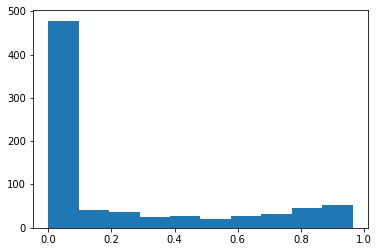

In [129]:
plt.hist(another_x[1])

# From the above histogram we can clearly see that after application of Gaussian blur, the image is changed slightly. The pixel intensity histogram is different this time.

In [199]:
# Split the new data (another_x) and y into train and test set.
# Note that we used the same y (labels) as before, as the labels have values between 0 to 9. So, there is no connection between the Gaussian blur and the...
# ...labels, so we can use it as it is.
X_train, X_test, y_train, y_test = train_test_split(another_x, y, train_size=0.75, random_state=0)

In [200]:
X_train.shape ##784 features

(7506, 784)

# Training our model
- First, we use the sklearn.ensemble module to create a **Random Forest classifier**.
- Next, we pass our training images and labels to the classifier's fit method, which trains our model.
- Finally, the test images and labels are passed to the score method to see how well we trained our model. Fit will return a float between 0-1 indicating our accuracy on the test data set

##### Try playing with the parameters of RandomForestClassifier() to see how the results change.¶

In [201]:
#Second model with pixels removed noise
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [202]:
clf.score(X_test, y_test)

0.9428457234212629

# Here we can clearly see that the accuracy is increased after applying the Gaussian Blur.

In [198]:
y_pred = clf.predict(X_test)

# How did our model do?
- You should have gotten around 0.9428, or **94.28% accuracy**. This is good.
- **We also see there is improvement in accuracy after using gaussian blurring.**


## Add-on:
- What's the problem with the above conclusion?
- How to solve it?

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

In [136]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Confusion Matrix ===
[[234   0   0   0   1   1   2   0   2   1]
 [  0 253   2   0   0   0   4   0   0   0]
 [  1   2 206   2   1   0   0   4   4   1]
 [  0   2   8 248   0   2   2   1   6   3]
 [  1   0   0   0 226   0   2   0   0  12]
 [  0   0   2   4   0 255   3   0   2   3]
 [  1   0   0   0   0   4 244   0   3   0]
 [  0   0   4   0   2   0   0 242   1   9]
 [  0   2   0   6   1   1   4   0 233   2]
 [  2   0   1   4   9   2   0   0   4 218]]


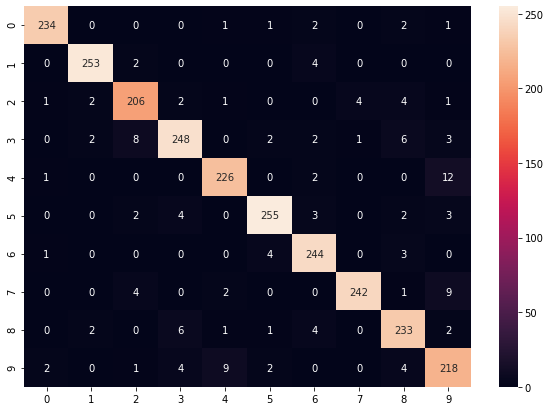

In [137]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [138]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       241
           1       0.98      0.98      0.98       259
           2       0.92      0.93      0.93       221
           3       0.94      0.91      0.93       272
           4       0.94      0.94      0.94       241
           5       0.96      0.95      0.96       269
           6       0.93      0.97      0.95       252
           7       0.98      0.94      0.96       258
           8       0.91      0.94      0.92       249
           9       0.88      0.91      0.89       240

    accuracy                           0.94      2502
   macro avg       0.94      0.94      0.94      2502
weighted avg       0.94      0.94      0.94      2502



### So, we got a pretty good accuracy on classification of the images of digits, as the classification report shows.

# In this mentor learning session we learnt that:
- The images can be represented using numpy array.
- If the array is 1-D, then we can visualize the image after reshaping the array to suitable shape. In this case we converted it to 2-D array.
- We visualized the image by plotting the numpy array using matplotlib.
- After that we saw that the pixel values' distribution in histogram, the black pixel's value is zero, and the white pixel's value is 1. These values are after normalization of pixel values, i.e. after dividing each value by 255.
- We used RandomForestClassifier as supervised classification method.
- We also used Gaussian Blurring as pre-processing method, and saw that there is improvement in the accuracy of model.
- During process of applying Gaussian Blurring, we also used certain reshaping techniques, which should be kept in mind, as it is important to know how the shape of array plays an important role in the image classification, their visualizaion.

## Add-on:
Algorithms vs. Models

In [140]:
new_x.shape

(10008, 28, 28)

In [141]:
new_x[0].shape

(28, 28)

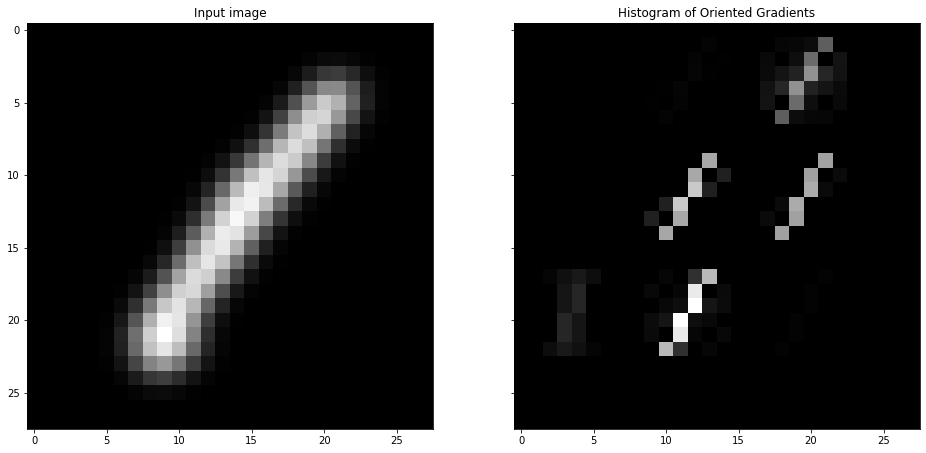

In [153]:
# Use better feature extraction technique called Hig Feature Descriptor that calculates gradients in the neigbourhood
from skimage.feature import hog
import tqdm
from skimage.feature import hog
i = 0
#Returns a 1D vector for an image
ppcr = 8
ppcc = 8
fd,hog_image = hog(new_x[i], orientations=8, pixels_per_cell=(ppcr,ppcc),block_norm= 'L2',visualize=True)

from skimage import exposure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(new_x[i], cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()
#orientation - Histogram buckets
#pixels per cell - size on which we calculate gradients

In [154]:
#Returns a 1D vector for an image
ppcr = 8
ppcc = 8
hog_images = []
hog_features = []
for image in new_x:
 fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppcr,ppcc),cells_per_block=(2,2),block_norm= 'L2',visualize=True)
 hog_images.append(hog_image)
 hog_features.append(fd)
hog_features = np.array(hog_features)
hog_features.shape

(10008, 128)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, y, train_size=0.75, random_state=0)

In [156]:
X_train.shape
#Feature vector reduce dimensionality and get similar accuracy as before

(7506, 128)

In [157]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [158]:
clf.score(X_test, y_test)

0.9460431654676259

In [149]:
y_pred = clf.predict(X_test)

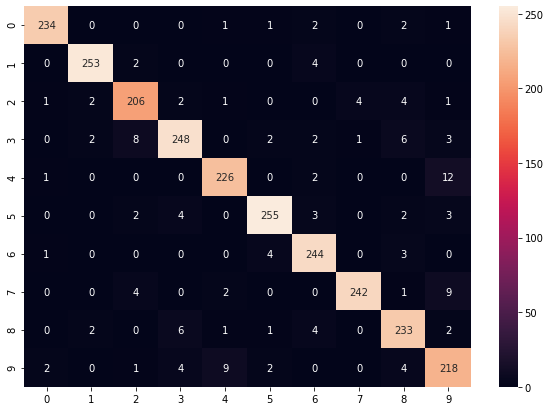

In [150]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [151]:
## SVM Classifier - Another model but get similar results as before
from sklearn.svm import SVC
svclassifier = SVC(random_state = 0,kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [152]:
clf.score(X_test, y_test)

0.9460431654676259